<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/VotingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.datasets import load_iris

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder=LabelEncoder()

In [7]:
df['type']=encoder.fit_transform(df['type'])

In [8]:
df.sample(4)

,sepal.length,sepal.width,petal.length,petal.width,type
54,6.5,2.8,4.6,1.5,1
28,5.2,3.4,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
122,7.7,2.8,6.7,2.0,2


In [9]:
import seaborn as sns

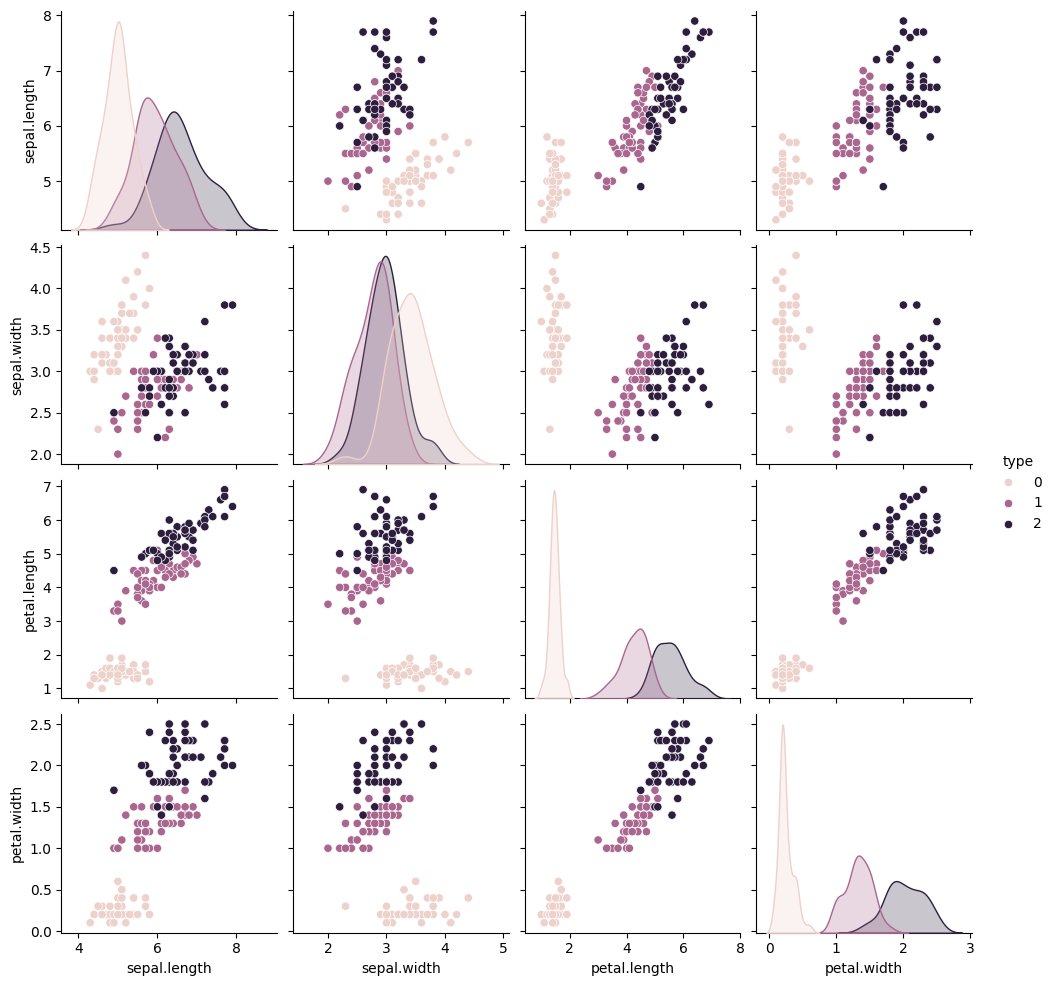

In [10]:
sns.pairplot(df, hue='type')

In [11]:
new_df=df[df['type']!=0][['sepal.length', 'sepal.width','type']]

In [12]:
new_df.head(5)

,sepal.length,sepal.width,type
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [13]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,2]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [15]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [16]:
estimators=[
    ('lr', clf1),
    ('rt',clf2),
     ('knn', clf3)
     ]

In [17]:
estimators

[('lr', LogisticRegression()),
 ('rt', RandomForestClassifier()),
 ('knn', KNeighborsClassifier())]

In [18]:
for estimator in estimators:
  x=cross_val_score(estimator[1], X,y, cv=10, scoring='accuracy')
  print(estimator[0], np.mean(x),2)


lr 0.75 2
rt 0.6 2
knn 0.6100000000000001 2


In [19]:
vc1=VotingClassifier(estimators=estimators, voting='hard')
x1=cross_val_score(vc1, X,y, cv=10, scoring='accuracy')
print(np.mean(x),2)

0.6100000000000001 2


In [ ]:
vc1=VotingClassifier(estimators=estimators, voting='soft')
x1=cross_val_score(vc1, X,y, cv=10, scoring='accuracy')
print(np.mean(x),2)


**Weight**

In [ ]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vc1=VotingClassifier(estimators=estimators, voting='soft', weights=[i,j,k])
      x1=cross_val_score(vc1, X,y, cv=10, scoring='accuracy')
      print("for i={}, j={}, k={}".format(i,j,k),np.round(np.mean(x),2))



**Classifier using same Algo**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import  make_classification

In [ ]:
X,y=make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [ ]:
svm1=SVC(probability=True, kernel='poly', degree=1)
svm2=SVC(probability=True, kernel='poly', degree=2)
svm3=SVC(probability=True, kernel='poly', degree=3)
svm4=SVC(probability=True, kernel='poly', degree=4)
svm5=SVC(probability=True, kernel='poly', degree=5)

In [ ]:
estimators=[
    ('svm1', svm1),('svm2', svm2),('svm3', svm3),('svm4', svm4),('svm5', svm5)
     ]

In [ ]:
for estimator in estimators:
  x=cross_val_score(estimator[1], X,y, cv=10, scoring='accuracy')
  print(estimator[0], np.round(np.mean(x),2))


In [ ]:
vc1=VotingClassifier(estimators=estimators, voting='soft')
x1=cross_val_score(vc1, X,y, cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))
